In [4]:
print ("{}, Ejemplo de la funcion format."
                        .format("IntroFisicaComputacional")) 
  
str = "Esta clase es en {}"
print (str.format("Python")) 
  
#b binario, c caracter, d decimal, f flotante, e exponencial, g general (escoge Python el mejor formato)
print("{0:b},{0:c},{0:d},{0:f},{0:e},{0:g}".format(91))

IntroFisicaComputacional, Ejemplo de la funcion format.
Esta clase es en Python
1011011,[,91,91.000000,9.100000e+01,91


# Continuación de Raíces

In [2]:
# matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Método del Secante

En el método de Newton aproximamos $f(x)$ por la recta secante (que corta a la función en dos puntos).

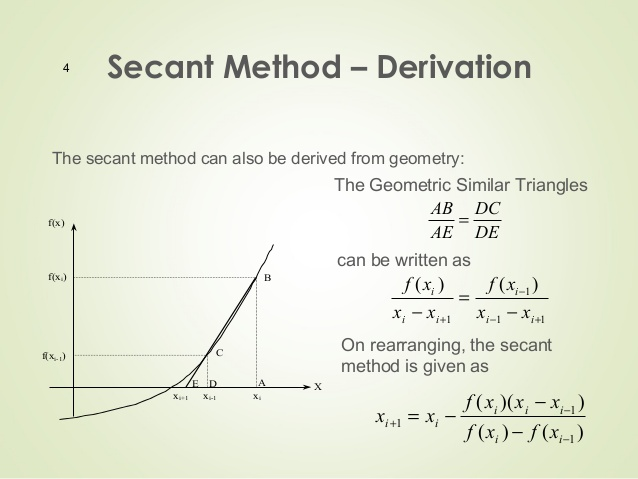

In [3]:
from IPython.display import Image
Image("secante_2.jpg")

Iremos iterando el proceso hasta encontrar la raíz ($x_n$ --> $\alpha$). 

Otra forma de obtener el método, es tomar la interpolación líneal de la forma $$ q(x) = a_0 + a_1 x, $$ para lo cual se necesitan dos estimaciones de $x_0$ y $x_1$ para $\alpha$. Con las condiciones 
$$ q(x_0) = f(x_0), \qquad q(x_1) = f(x_1) $$
Esta función también se llama *secante* de $f$ y es de la forma
$$ q(x) = \frac{(x_1 - x) f(x_0) + (x - x_0) f(x_1)}{x_1 - x_0}$$

In [4]:
def sec_q(x, f, x0, x1):
    return ((x1 - x) * f(x0) + (x - x0) * f(x1)) / (x1 - x0)

def sec_plot(ax, f, x0, x1, xrange = None, alpha = None):
    if xrange is None: #Creamos el rango en x para graficar
        delta_x = abs(x0 - x1)
        xrange = (min(x0, x1) - 0.2 * delta, max(x0, x1) + 0.2 * delta)
    x = np.linspace(xrange[0], xrange[1])
    ax.plot(x, f(x), 'r')
    ax.plot(x, sec_q(x, f, x0, x1), 'b--')
    ax.plot([x0, x1], [f(x0), f(x1)], 'bo')

    for i, xx in [(0, x0), (1, x1)]:
        ax.plot([xx, xx], [0, f(xx)], 'b:')
        if f(xx) >= 0:
            ax.annotate(r"$x{}$".format(i), xy=(xx, 0), xytext=(xx - 0.03, -0.06))
            ax.annotate(r"$(x{0}, f(x{0}))$".format(i), 
                        xy=(xx, f(xx)), xytext=(xx + .03, f(xx) - 0.03))
        else:
            ax.annotate(r"$x{}$".format(i), xy=(xx, 0), xytext=(xx - 0.03, 0.03))
            ax.annotate(r"$(x{0}, f(x{0}))$".format(i), xy=(xx, f(xx)), 
                        xytext=(xx +.01, f(xx)-0.06))
    
    if alpha is not None:
        ax.annotate(r"$\alpha$", xy=(alpha, 0), xytext=(alpha - 0.02, 0.02))
    
    ax.axhline()
    ax.axvline()

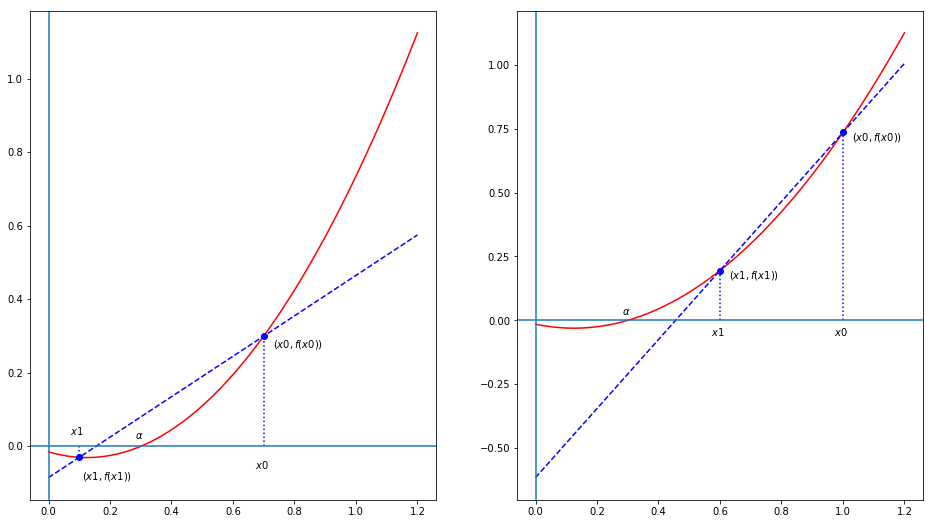

In [5]:
def ff(x):
    return (x - 0.3) * (x + 0.05)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 9)) 
sec_plot(ax1, ff, 0.7, 0.1, xrange=(0, 1.2), alpha=0.3)
sec_plot(ax2, ff, 1.0, 0.6, xrange=(0, 1.2), alpha=0.3)

Siguiente paso:

Tenemos que encontrar la solución para
$$ 0 = q(x_2) = \frac{(x_1 - x_2) f(x_0) + (x_2 - x_0) f(x_1)}{x_1 - x_0} $$
El numerador será cero, tal que:
$$ x_2 = \frac{f(x_1) x_0 - f(x_0) x_1}{f(x_1) - f(x_0)} $$

Esta expresión puede presentar una perdida de precisión, (división de números muy pequeños). Es mejor (computacionalmente) hacer el álgebra y expresar el método de la siguiente forma: 
$$ x_2 = x_1 - f(x_1) \left(\frac{f(x_1) - f(x_0)}{x_1 - x_0}\right)^{-1} $$
Iterando n-veces:
$$ 
x_{n+1} = x_n - f(x_n) \left(\frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}}\right)^{-1}, \qquad
  n = 1, 2, 3, \dots    
$$

Buscamos la raiz de $f(x) = x^6 - x - 1$ con los estimados iniciales $x_0 = 2$ y $x_1 = 1$.

In [6]:
def f(x):
    return x**6 - x - 1

In [7]:
def secante(f, x0, x1, delta=1e-9):
    f0 = f(x0)
    f1 = f(x1)
    res = [[x0, f(x0), np.nan], #nan es el paso inicial del Data Frame
           [x1, f(x1), x1 - x0],]
    while True: 
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0) #secante
        f2 = f(x2)
        res.append([x2, f2, x2-x1])
        if abs(f2) < delta:
            break
        f0 = f1
        f1 = f2
        x0 = x1
        x1 = x2
    return res

In [8]:
res = secante(f, 2, 1)
pd.set_option("precision", 15)
pd.DataFrame(res, index=range(len(res)), 
                  columns=["$x_n$", "$f(x_n)$", "$x_n - x_{n-1}$"])

,$x_n$,$f(x_n)$,$x_n - x_{n-1}$
0,2.000000000000000,61.000000000000000,NaN
1,1.000000000000000,-1.000000000000000,-1.000000000000000
2,1.016129032258065,-0.915367713820643,0.016129032258065
3,1.190577768676637,0.657465696717507,0.174448736418573
4,1.117655830941552,-0.168491167838804,-0.072921937735086
5,1.132531550216133,-0.022437286187950,0.014875719274581
6,1.134816808004853,0.000953564064100,0.002285257788720
7,1.134723645948705,-0.000005066165712,-0.000093162056148
8,1.134724138291216,-0.000000001134763,0.000000492342511
9,1.134724138401520,0.000000000000002,0.000000000110304


Converge más lento que Newton, pero no necesitamos conocer la derivada $f'(x)$.


### Otra deducción del método de la secante

Puede verse como una aproximación al método de Newton,
$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$
sustituimos la definición de la derivada.
$$ f'(x_n) \approx \frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}} $$

## Estimación del error

Usamos la expansión de Taylor cerca de $x = x_n$ para calcular $f(\alpha)$.
\begin{align}
0 &= f(\alpha)\\
  &= f(x_n) + (\alpha - x_n) f'(x_n) + \frac{1}{2} (\alpha - x_n)^2 f''(\xi_n)\\
\end{align}
con $\xi_n$ entre $\alpha$ y $x_n$. Dividimos por $f'(x_n)$ para obtener:
$$ 0 = \frac{f(x_n)}{f'(x_n)} + \alpha - x_n + (\alpha - x_n)^2 \frac{f''(\xi_n)}{2 f'(x_n)} $$
Donde volvemos a obtener el método de la secante 
$$ \frac{f(x_n)}{f'(x_n)} - x_n = - x_{n+1} $$
Con un error (que es lo que desprecimos)
$$ \alpha - x_{n+1} = -\frac{f''(\xi)}{2 f'(x_n)} (\alpha - x_n) ^2 $$


## Análisis de Convergencia

Extendiendo la serie a infinito $\lim_{n \to \infty} x_{n+1}=\alpha$, por lo que: 
$$ 
\lim_{n \to \infty} \frac{|\alpha - x_{n+1}|}{|\alpha - x_n|^r} 
  = \left| \frac{f''(\alpha)}{2 f'(\alpha)} \right|^{r-1}
  \equiv c
$$
con $r = 1/2 (1+\sqrt{5}) \approx 1.62$. Para que se cumple hay que suponer que $x_0$ y $x_1$ están suficientemente cerca a $\alpha$. También hay que requere que $f$ tiene dos derivadas continuas en un intervalo alrededor de $\alpha$. 

Nos dice sobre el error de $x_n$
$$ |\alpha - x_{n+1}| \approx c |\alpha - x_n|^r $$

Se parece mucho al caso del metodo de Newton con
$$ \alpha - x_{n+1} \approx M\,(\alpha - x_n)^2, \qquad M = - \frac{f''(\alpha)}{2f'(\alpha)} $$

Ambos metodos tienen convergencia más rápida que lineal, se llaman *metodos superlineales*.

Para $x_n$ cerca de $\alpha$ tenemos $c_n$ cerca de $\alpha$.
$$ \alpha - x_{n+1} \approx = -\frac{f''(\alpha)}{2f'(\alpha)} (\alpha - x_n)^2 $$
Eso nos dice que el metodo de Newton tiene *convergencia cuadrática* con las condiciones
1. $f'(\alpha) \not= 0$
2. $f$ puede diferenciarse dos veces en la vecindad de $\alpha$.

In [9]:
f=lambda x: x**3-10*x**2+5
df=lambda x: 3*x**2-20*x
print(secante(f,0,0.8))

[[0, 5, nan], [0.8, -0.8880000000000008, 0.8], [0.6793478260869564, 0.6983934836545584, -0.12065217391304361], [0.732463709956771, 0.027938177034098288, 0.053115883869814584], [0.7346770729538628, -0.0009617701231894316, 0.002213362997091739], [0.7346034137741144, 1.229073959940763e-06, -7.365917974833103e-05], [0.734603507785179, 5.39168709678961e-11, 9.401106459971942e-08]]


In [10]:
import numpy as np
def secante(f, x0, x1, n=1000):
    f0 = f(x0)
    f1 = f(x1)
    res = [[x0, f(x0), np.nan],
           [x1, f(x1), x1 - x0],]
    delta=1/float(n)
    while True:
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        f2 = f(x2)
        res.append([x2, f2, x2-x1])
        if abs(f2) < delta:
            break
        f0 = f1
        f1 = f2
        x0 = x1
        x1 = x2
    return res

In [11]:
import pandas as pd
f=lambda x: x**3-10*x**2+5
df=lambda x: 3*x**2-20*x
res = secante(f,0,0.8,1000)
pd.set_option("precision", 15)
pd.DataFrame(res, index=range(len(res)), 
                  columns=["$x_n$", "$f(x_n)$", "$x_n - x_{n-1}$"])

,$x_n$,$f(x_n)$,$x_n - x_{n-1}$
0,0.000000000000000,5.000000000000000,NaN
1,0.800000000000000,-0.888000000000001,0.800000000000000
2,0.679347826086956,0.698393483654558,-0.120652173913044
3,0.732463709956771,0.027938177034098,0.053115883869815
4,0.734677072953863,-0.000961770123189,0.002213362997092


## Comparación de costo computacional entre Newton y Secante

Para el método de Newton tenemos
$$ x_{n+1} = x_n + \frac{f(x_n)}{f'(x_n)} $$
Para cada itereación  hay que **evaluar dos funciones** ($f(x_n)$ y $f'(x_n)$), es decir

En el metodo del secante tenemos 
$$ 
x_{n+1} = x_n - f(x_n) \left(\frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}}\right)^{-1}
$$
que requiere solamente la evaluación de $f(x_n)$, guardamos $f(x_{n-1})$ de la iteración anterior. Entonces require solmante **una evaluación de una función** por iteración.

Por eso es muchas veces más rápido utilizar el metodo del secante, aún que requiere más iteraciónes, que el metodo de Newton.

## Ventajas y desventajas

### Ventajas

1. Convergencia superlineal $\Rightarrow$ más rápido que bisección.
2. No requiere el uso de la derivada.
3. Solamente requiere una evaluación de la función por iteración.

### Desventajas

1. No siempre converge.
2. No hay limite garantizado para el error.
3. Tipicamente tiene problemas cuando $f'(\alpha) = 0$.
4. El metodo de Newton se generaliza más fácilmente a sistemas de ecuaciones no-lineales.

## Método de Ridders

Suponemos que la raíz está en el intervalo ($x_1$,$x_2$). En este intervalo, tomamos el punto medio $x_3$ y evaluamos f($x_3$), ver figura. Decimos que existe una función: 
$$g(x)=f(x)e^{(x-x_1)}Q$$

con una $Q$ tal que $x_1$, $x_2$ y $x_3$ están unidos por una recta. Definimos las evaluaciones de los puntos $f$'s como $f_1=f(x_1)$, $f_2=f(x_2)$ y $f_3=f(x_3)$. Si hacemos la transformación de los puntos, tenemos que los puntos $g$'s se relacionan con los $f$'s por:
\begin{align}
g_1=g(x_1)&=f_1\\
g_2=g(x_2)&= f_2e^{2hQ}\\
g_3=g(x_3)&= f_3e^{hQ}
\end{align}

Por la construcción de la recta $g(x)$ monótona creciente, se tiene que:
$$g_3=\frac{g_1+g_2}{2}$$
Sustituyendo los valores de las $g$'s en términos de $f$'s: 

$$f_3 e^{hQ}=\frac{1}{2} \left[f_1+f_2e^{2hQ} \right]$$

Que es una ecuación cuadrática con $x=e^{hQ}$, la solución a la cuadrática es:
$$e^{hQ}=\frac{f_3\pm \sqrt{f_3^2-f_1f_2}}{f_2}$$.

Nota: La genialidad del método consiste en usar la función exponencial para crear la transformación de los puntos. La exponencial es una función estrictamente positiva y monotona creciente, lo que significa que ponderar los tres puntos con un exponencial no cambiará sus signos. Por lo tanto, la raíz de la linealización tendrá que aterrizar dentro del intervalo original.

Los polinomios, las funciones racionales, las sinusoidales y los logaritmos tienen puntos positivos y negativos, por lo que su uso probablemente conlleva el riesgo de obtener malas raíces interpoladas.

Una función constante también es técnicamente de un sólo signo y monótona creciente, pero no cumpliría con la propiedad de ser lineal en $x_1$, $x_2$ y $x_3$.

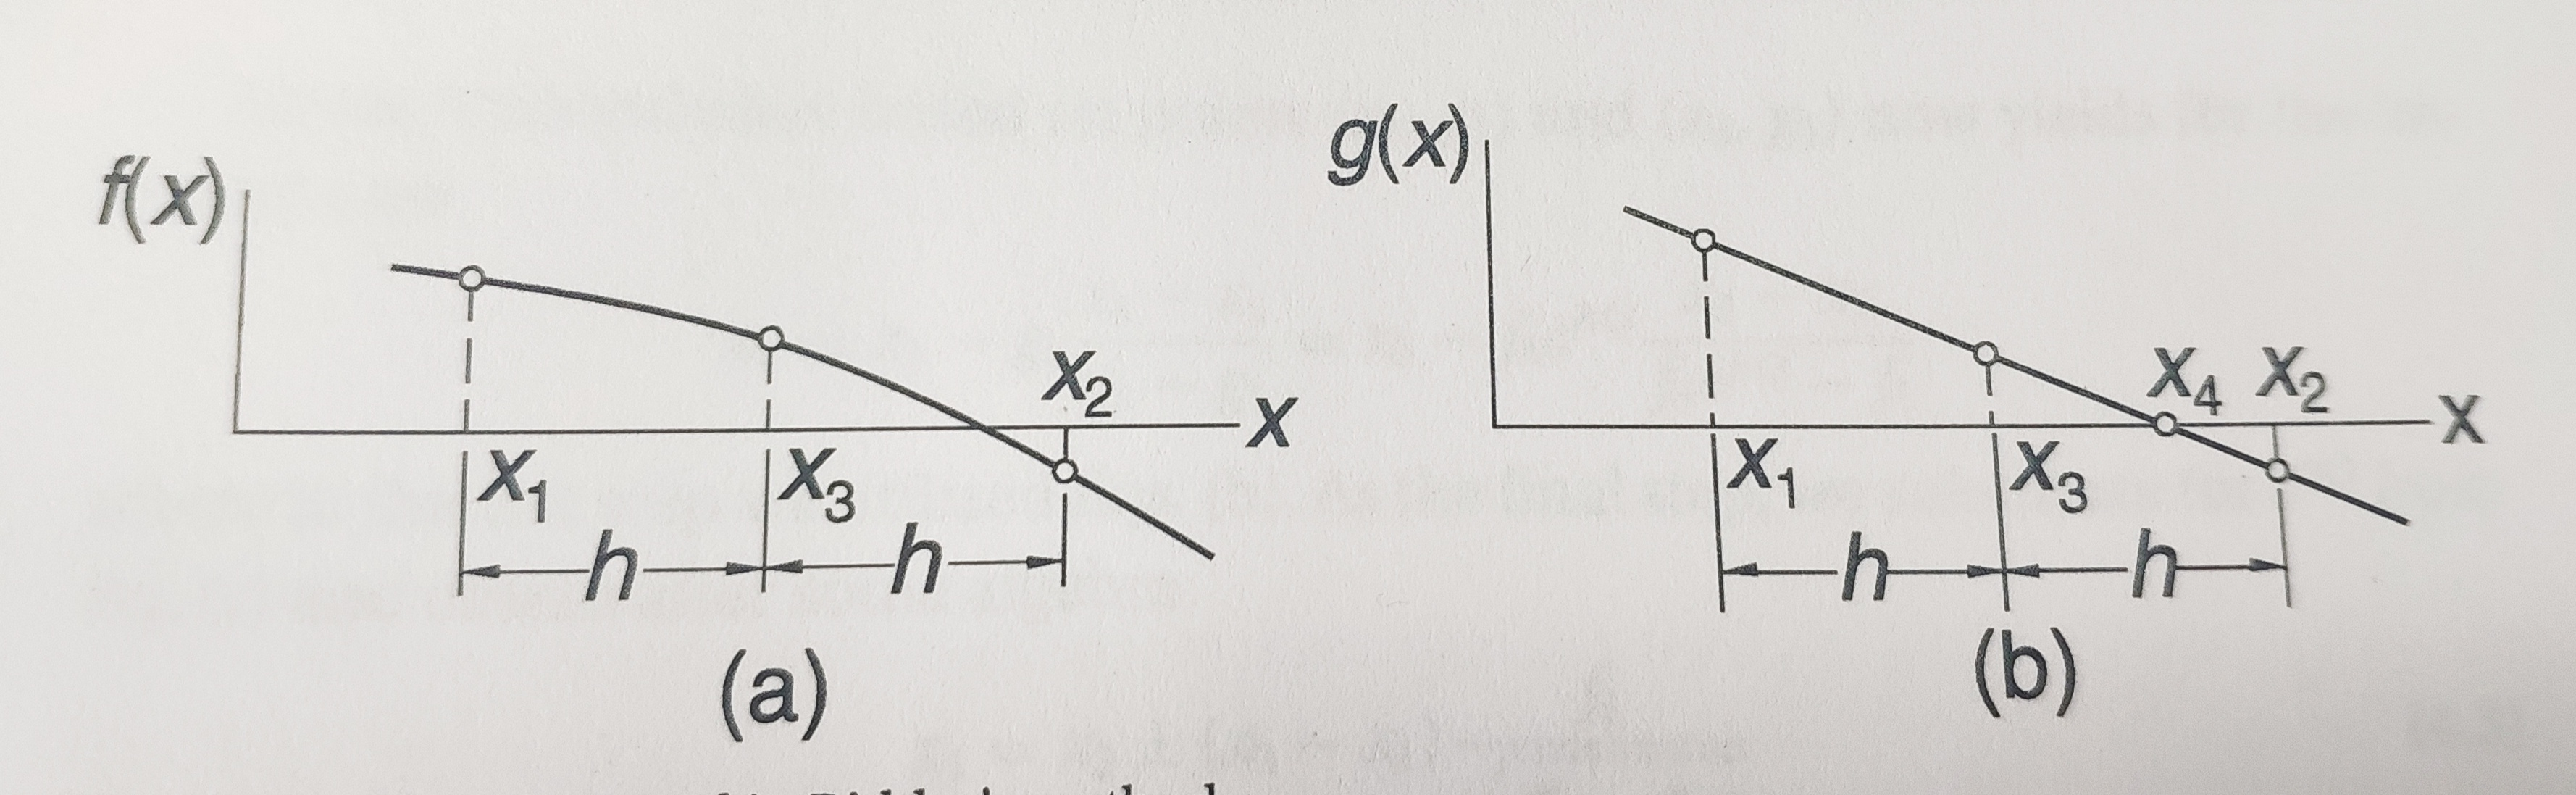

In [12]:
from IPython.display import Image
Image("ridder.jpg")

Ya con la transformación definida, podemos encontrar la raíz con la función g (que es lineal) y traérla a $f$. Para resolver la raíz $x_4$.

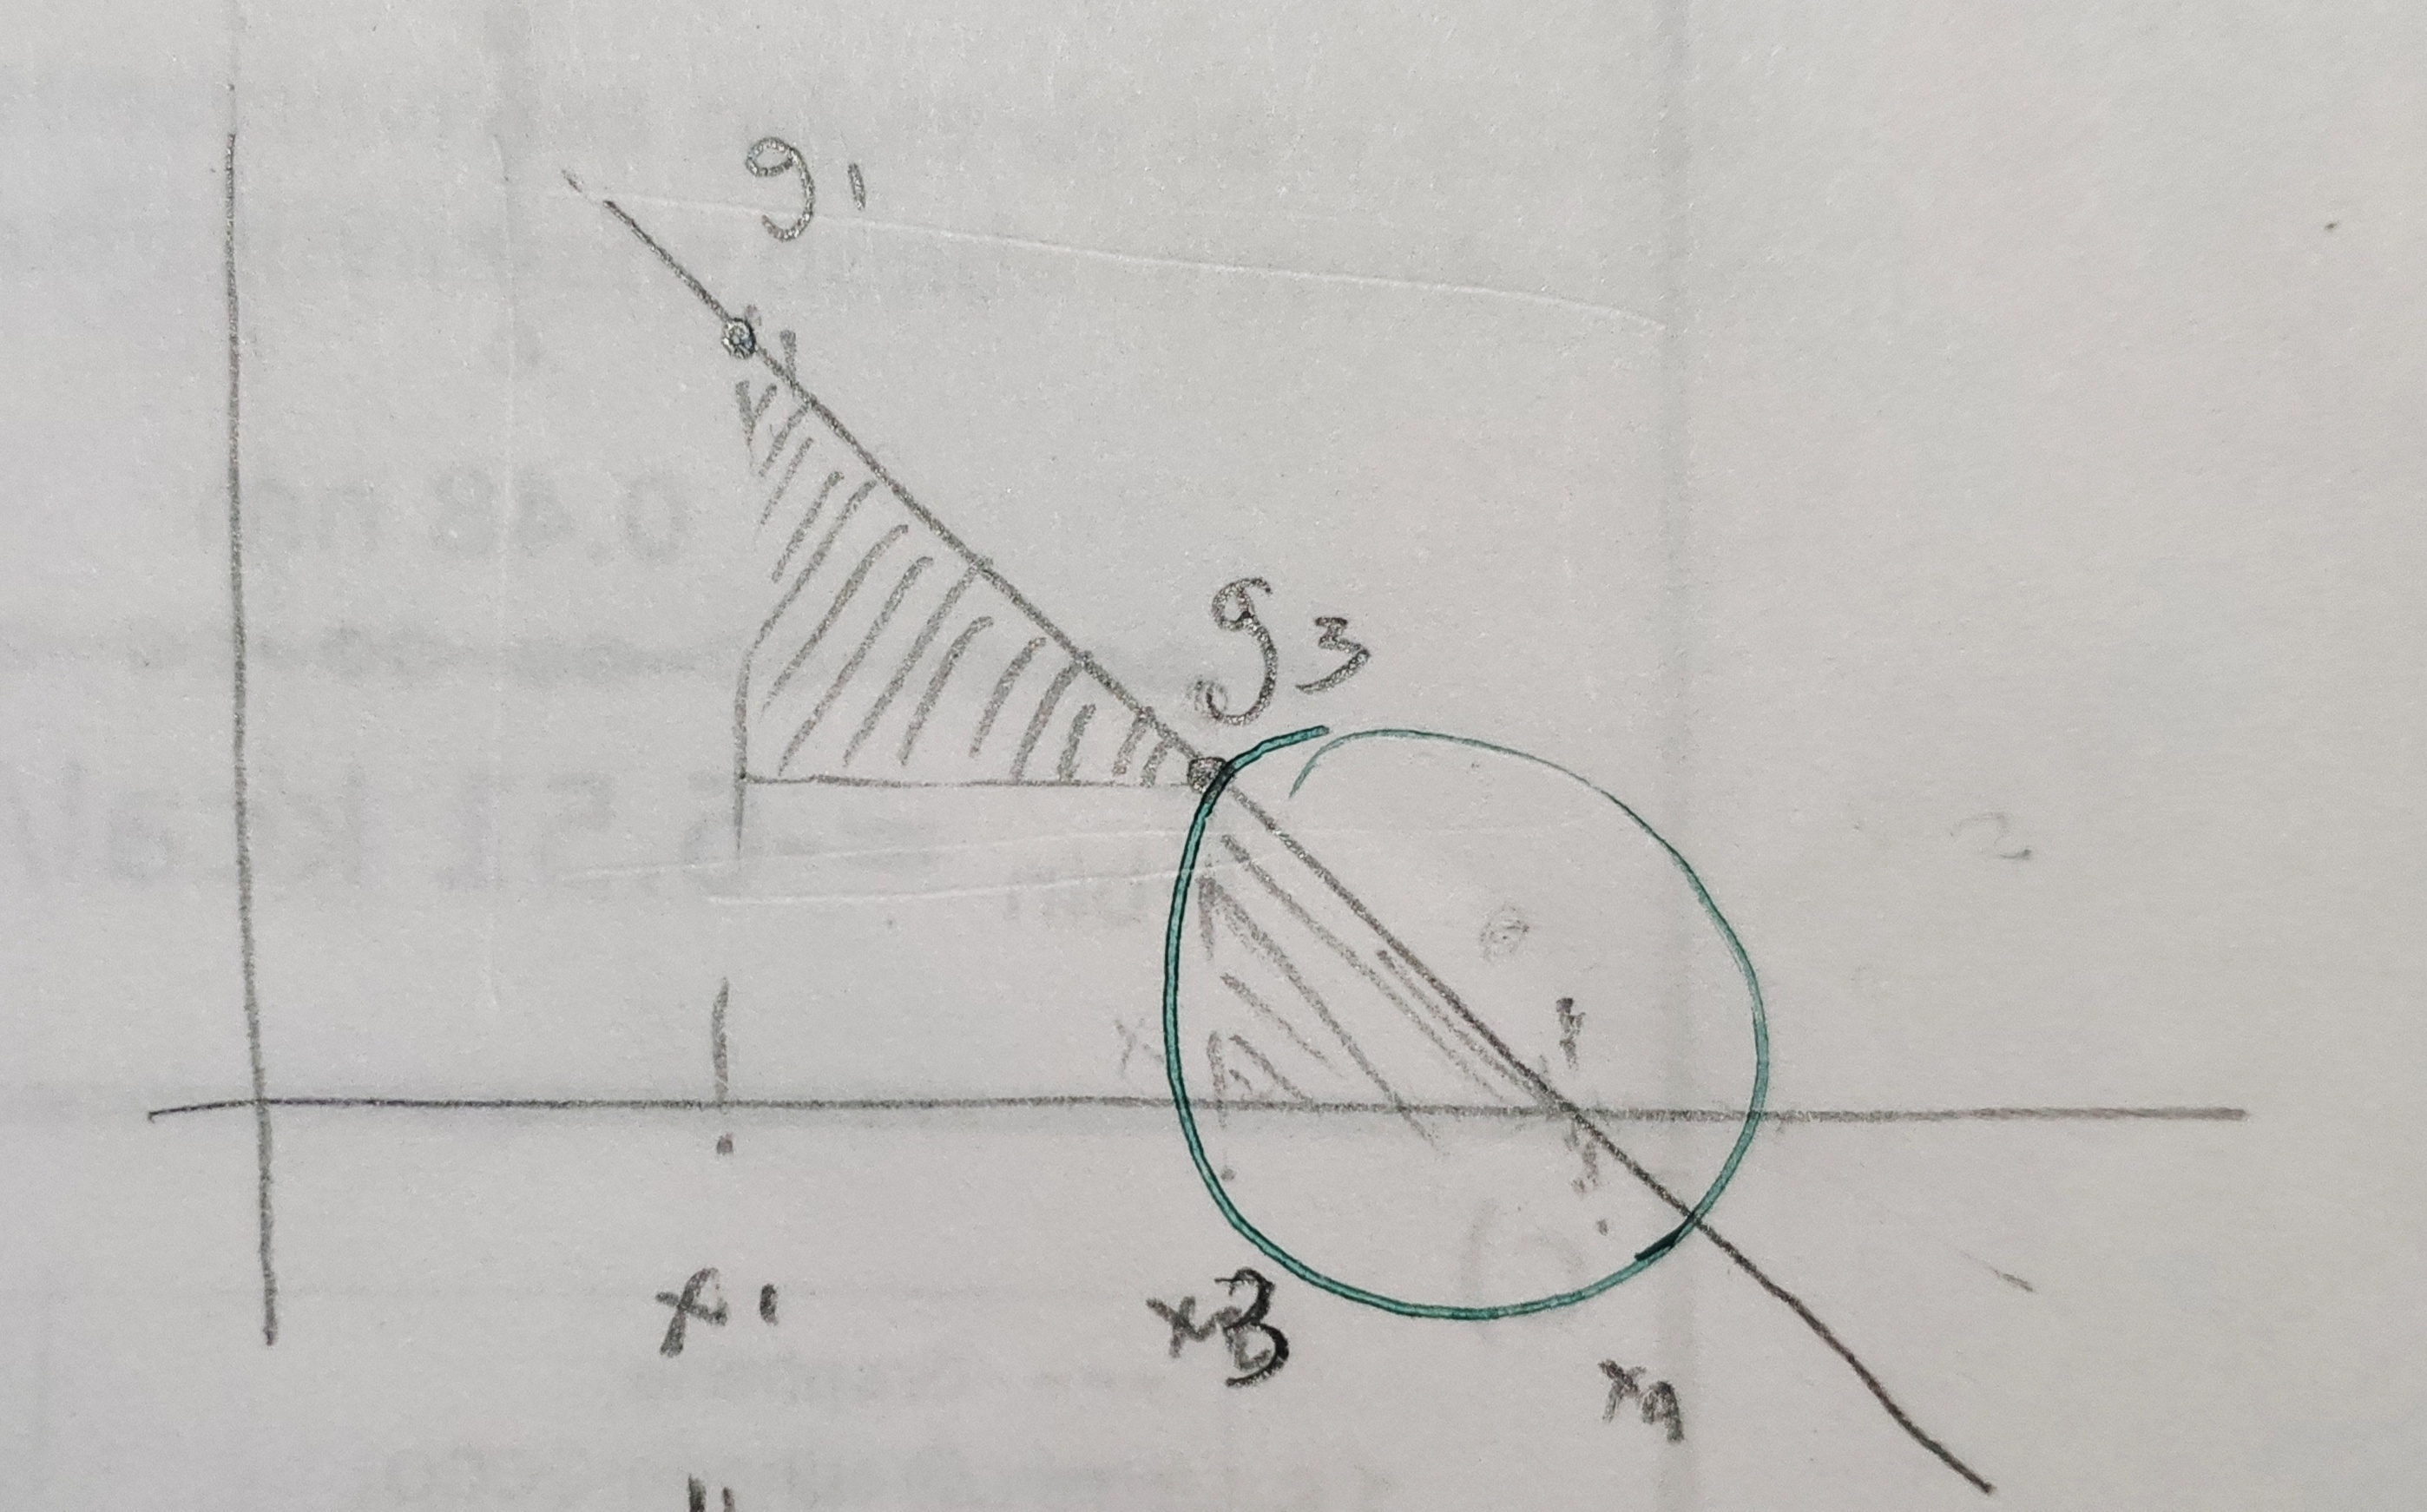

In [17]:
from IPython.display import Image
Image("ridder_2.jpg")

Planteando la semejanza de triángulos:
    $$\frac{g_3}{x_3-x_4} = \frac{g_3-g_1}{x_3-x_1}$$
 con la raíz:
 
\begin{align}
x_4=&x_3-g_3\frac{x_3-x_1}{g_3-g_1}\\
x_4=&x_3-f_3e^{hQ}\frac{x_3-x_1}{f_3e^{hQ}-f_1}
\end{align}

Sustituyendo la $e^{hQ}$ encontrada arriba, tenemos:

$$x_4=x_3\pm(x_3-x_1)\frac{f_3}{\sqrt{f_3^2-f_1f_2}}$$

Que es la sucesión a iterar del método de Ridders.

Viéndo los signos, en el artículo original, la expresión usada por Ridders es:
    
$$x_4=x_3+\sgn(f_1)\frac{f_3}{\sqrt{f_3^2-f_1f_2}}$$

Literal, tomamos el signo de $f_1$ para escoger el signo de la solución. Cómo $f_1$ y $f_2$ tienen signos opuestos, ya que existe la raíz en ese intervalo, el discriminante siempre es positivo.

In [18]:
#Aquí va tu código

In [2]:
#Este es el código de Roxana y Jordi
from math import *
def ridders(f,x1,x2,tol=1e-9):
    n=0
    f1=f(x1)
    if f1==0: return x1
    f2=f(x2)
    if f2==0: return x2
   # if f1*f2>0.0: return np.nan #intervalos correctos
    while abs(x1-x2)> tol:
        x3=0.5*(x1+x2);f3=f(x3)
        raiz=sqrt(f3**2.-f1*f2)
        if raiz==0:return None
        fraccion=(x3-x1)*f3/raiz
        if (f1-f2)<0.0: fraccion=-fraccion
        x4=x3+fraccion; f4=f(x4)
        if (f3*f4)>0.0:
            if f1*f4>0.0:x1=x3;f1=f3
            else: x2=x3;f2=f3
        else:             
            x1=x3;x2=x4;f1=f3;f2=f4
        n+=1
    return x4,n
            
def funcion(x):
    a=(x-0.3)**2+0.01
    b=(x-0.8)**2+0.04
    return 1.0/a-1.0/b

f=lambda x:x**3-10*x**2+5
print(ridders(f,0.5,1,0.0000002)) #De acuerdo a Mathematica, el resultado con tolerancia 10-17 es 0.7346035077893032
print(ridders(funcion,0.5,1,0.000002))

(0.7346035077893032, 18)
(0.5800000000000001, 18)


In [8]:
#Este es el codigo del Kiusalaas
from math import *
#no uso el modulo error (no lo necesito)
def ridders(f,a,b,tol=1e-6):
    contador=1
    fa=f(a)
    if fa==0: return [a,contador]
    fb=f(b)
    if fb==0: return [b,contador]
    if fa*fb>0.0: return('No es el intervalo con la raíz incluida') # o print() o error.error()
    for i in range(30): 
        c=0.5*(a+b);fc=f(c) #tomamos el punto medio, sería la x3
        s=sqrt(fc**2-fa*fb)
    if s==0.0: return None
    dx=(c-a)*fc/s
    if(fa-fb)<0.0:dx=-dx #selecciono los signos
    x=c+dx; fx=f(x)
    #aquí acaba el metodo
    #pruebo la convergencia
    x_vieja=x
    if i>0:
        if abs(x-x_vieja) < tol*max(abs(x),1.0): return [x,contador]
    #x_vieja=x
    if fc*fx>0.0:
        if fa*fx<0.0: b=x;fb=fx
        else: a=x;fa=fx
    else:
        a=c;b=x;fa=fc;fb=fx
    contador=contador+1
    return None
    print('Muchas iteraciones')

def funcion(x):
    a=(x-0.3)**2+0.01
    b=(x-0.8)**2+0.04
    return 1.0/a-1.0/b

f=lambda x:x**3-10*x**2+5
print(ridders(f,0.5,0.8,0.000002))
print(ridders(funcion,0.5,1,0.000002))

[0.7349780381710644, 1]
[0.5359980826165391, 1]
